In [2]:
###################
# Import packages #
###################

# linear algebra
import numpy as np 
# data processing
import pandas as pd
from datetime import datetime
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data preprocessing, modeling and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

##################
# Data analysis
##################
# import data : 
# Important!!!! be sure to have the .csv document containing data in the same folder of this ipython notebook 
data_df = pd.read_csv('./data.csv')

# Print important informations
print('There are %d null values' % data_df.isnull().any().sum())
print('The dataset contains the following features:')
print(data_df.columns)

# Feature engineering 1: from the feature "datetime" we create four other features: year, month, day, hour 
data_df["datetime"] = pd.to_datetime(data_df["datetime"])
data_df['Year'] = pd.to_datetime(data_df['datetime']).dt.year
data_df['Month'] = pd.to_datetime(data_df['datetime']).dt.month
data_df['Day'] =  pd.to_datetime(data_df['datetime']).dt.weekday
data_df['Hour'] = pd.to_datetime(data_df['datetime']).dt.hour


There are 0 null values
The dataset contains the following features:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


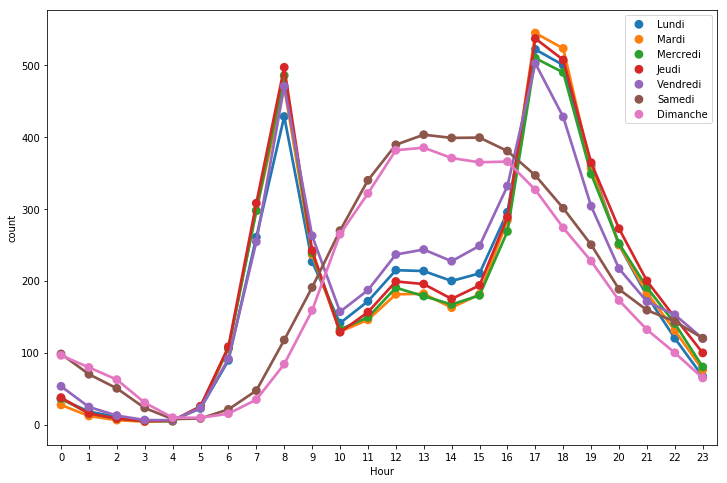

In [3]:
## Feature "Hour" for each day
# For each day of the week plot average count as function of the hour
f, ax = plt.subplots(figsize=(12, 8))
Hour_Day = pd.DataFrame(data_df.groupby(['Day','Hour'])['count'].mean()).reset_index()
sns.pointplot(x=Hour_Day['Hour'], y=Hour_Day['count'],hue = Hour_Day['Day'], data=Hour_Day, join=True)
ax.set(xlabel='Hour', ylabel='count')
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles,  ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.savefig('hour_day.png')

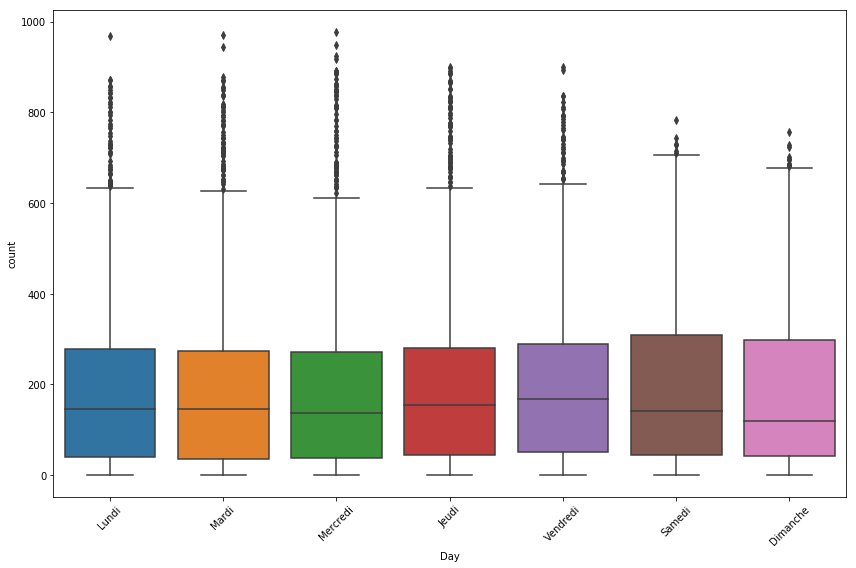

In [3]:
## Feature "Day"
# create a box plot for variable count averaged over the hours of the day, for each weekday
var = 'Day'
data = pd.concat([data_df['count'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y='count', data=data)
xticklabels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
ax.set_xticklabels(xticklabels, rotation = 45)
plt.tight_layout()
plt.savefig('weekday.png')

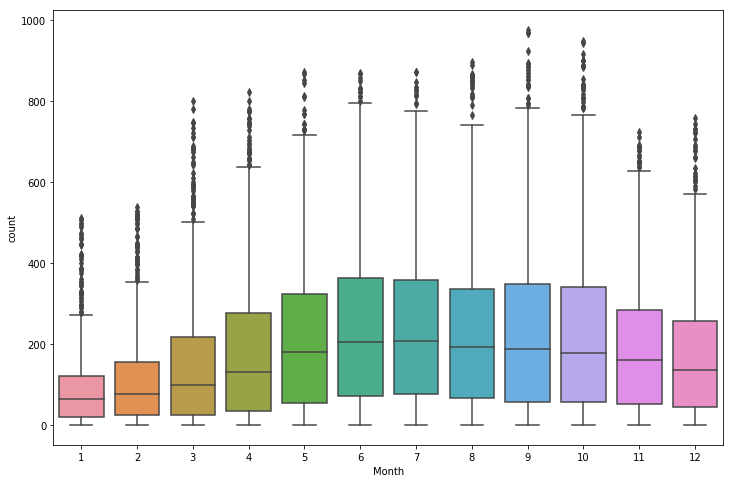

In [4]:
## Feature "month"
# create a box plot representing the properties of the variable count for each month 
var = 'Month'
data = pd.concat([data_df['count'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y='count', data=data)
plt.savefig('month.png')

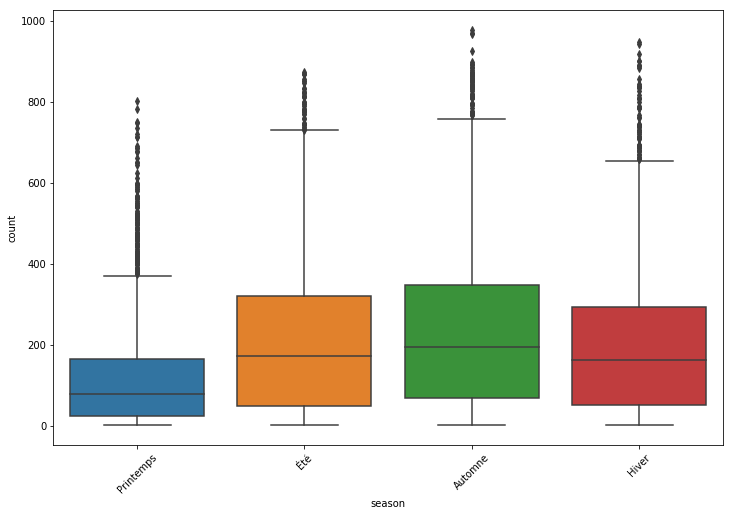

In [5]:
## Feature "Season"
# create a box plot representing the properties of the variable count for each season 
var = 'season'
data = pd.concat([data_df['count'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y='count', data=data)
xticklabels = ['Printemps', 'Été', 'Automne', 'Hiver']
ax.set_xticklabels(xticklabels, rotation = 45)
plt.savefig('season.png')

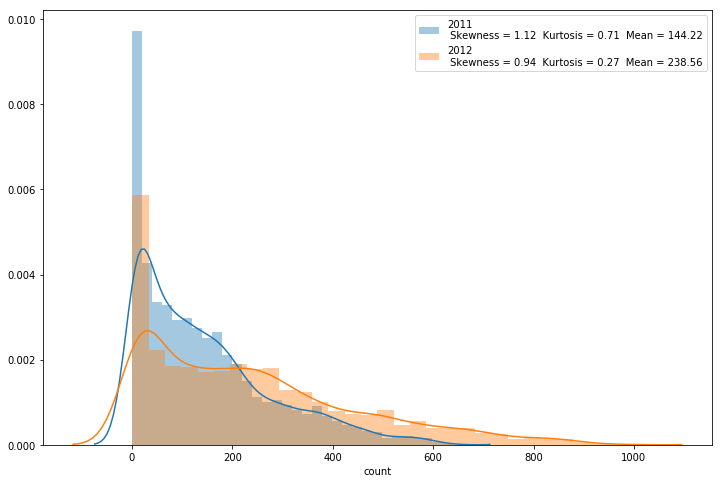

In [6]:
## Feature "year"
# plot count distribution for the two years in the dataset
data_2011 = data_df[data_df['Year'] == 2011]
data_2012 = data_df[data_df['Year'] == 2012]
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(data_2011['count'], label = '2011\n Skewness = %.2f  Kurtosis = %.2f  Mean = %.2f' % (data_2011['count'].skew(), data_2011['count'].kurt(), data_2011['count'].mean()) )
sns.distplot(data_2012['count'], label = '2012\n Skewness = %.2f  Kurtosis = %.2f  Mean = %.2f' % (data_2012['count'].skew(), data_2012['count'].kurt(), data_2012['count'].mean()))
plt.legend()
plt.savefig('year.png')

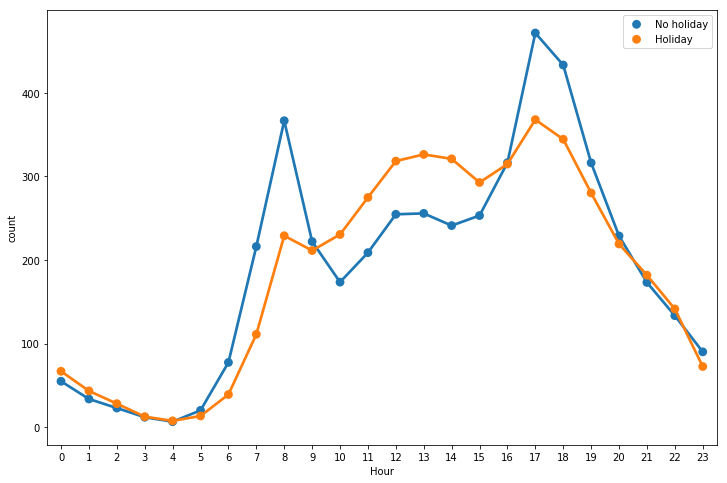

In [7]:
## Feature "holiday"
# plot the average count as function of the hours for holidays and not holidays
f, ax = plt.subplots(figsize=(12, 8))
Hour_h = pd.DataFrame(data_df.groupby(['Hour','holiday'],sort=True)['count'].mean()).reset_index()

sns.pointplot(x=Hour_h['Hour'], y=Hour_h['count'],hue = Hour_h['holiday'], data=Hour_h, join=True, legend_out = True)
ax.set(xlabel='Hour', ylabel='count')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles,  ['No holiday', 'Holiday'])
plt.savefig('hour_hol.png')

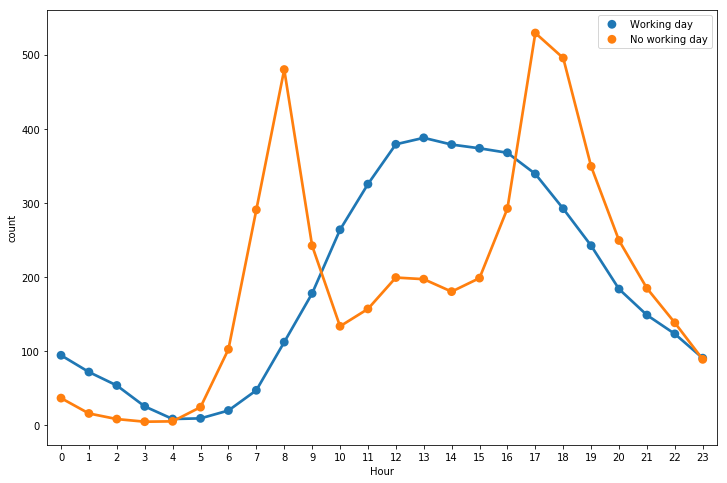

In [8]:
## Feature "workingday"
# plot the average count as function of the hours for working days and not working days
f, ax = plt.subplots(figsize=(12, 8))
Hour_w = pd.DataFrame(data_df.groupby(['Hour','workingday'],sort=True)['count'].mean()).reset_index()

sns.pointplot(x=Hour_w['Hour'], y=Hour_w['count'],hue = Hour_w['workingday'], data=Hour_w, join=True, legend_out = True)
ax.set(xlabel='Hour', ylabel='count', label='big')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles,  ['Working day', 'No working day'])
plt.savefig('hour_work.png')

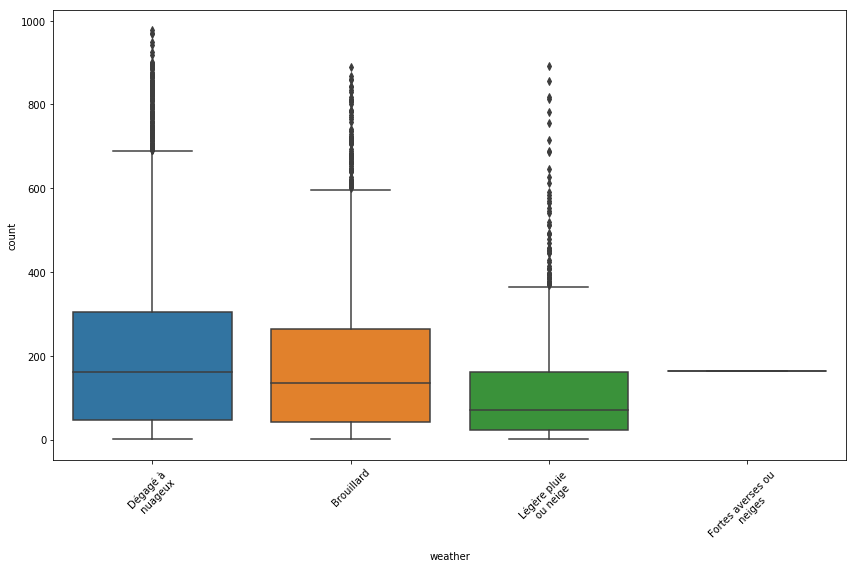

In [9]:
## Feature "Weather"
# create a box plot representing the properties of the variable count for different weather conditions 
var = 'weather'
data = pd.concat([data_df['count'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y='count', data=data)
xticklabels = ['Dégagé à \n nuageux', 'Brouillard', 'Légère pluie \nou neige', 'Fortes averses ou \n neiges']
ax.set_xticklabels(xticklabels, rotation = 45)
plt.tight_layout()
plt.savefig('weather.png')

       count        mean         std    min     25%    50%     75%    max
temp                                                                     
0.82     7.0   77.714286  118.135112    1.0    1.50   14.0  105.50  315.0
1.64     2.0   91.500000  125.157900    3.0   47.25   91.5  135.75  180.0
2.46     5.0   43.000000   40.478389    2.0    7.00   43.0   64.00   99.0
3.28    11.0   19.272727   22.860844    1.0    3.50    9.0   25.00   74.0
4.10    44.0   50.272727   80.244210    1.0    6.50   17.0   68.50  417.0
4.92    60.0   58.416667   76.692052    1.0    6.00   28.0   91.25  423.0
5.74   107.0   53.233645   61.022356    1.0    8.00   30.0   82.00  245.0
6.56   146.0   68.109589   81.383394    1.0   12.25   47.0   94.25  501.0
7.38   106.0   67.754717   74.399285    1.0   15.25   53.0   83.00  471.0
8.20   229.0   81.995633  100.910265    1.0   13.00   52.0  102.00  636.0
9.02   248.0   73.616935   91.347683    1.0    8.75   49.0   95.50  659.0
9.84   294.0   86.442177  107.870807  

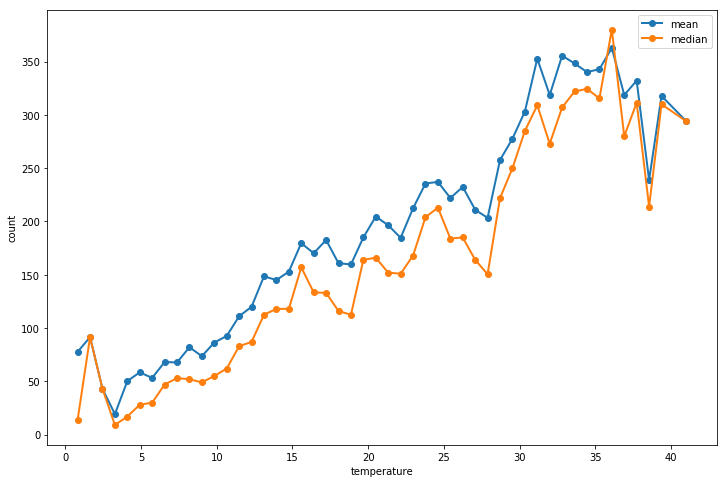

In [59]:
## temperature feature
# plot mean and median of count as function of the temperature
var = 'temp'
f, ax = plt.subplots(figsize = (12, 8) )
group_temp = data_df.groupby(var)['count']
print(group_temp.describe())
sample_size = group_temp.size()
ax.plot(group_temp.mean().reset_index()[var],group_temp.mean().reset_index()['count'], 'o-', lw = 2, label = 'mean' )
ax.plot(group_temp.median().reset_index()[var],group_temp.median().reset_index()['count'], 'o-',lw = 2, label = 'median')
ax.legend()
ax.set(xlabel='temperature', ylabel='count')
plt.savefig('temp.png')

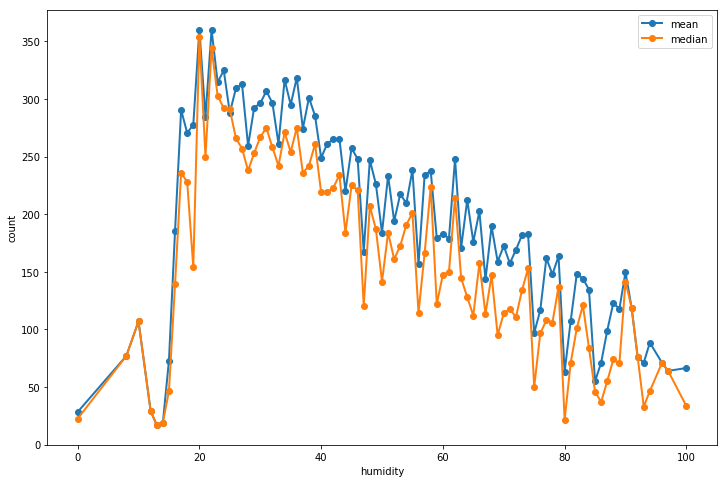

In [11]:
## humidity feature
# plot mean and median of count as function of the humidity
var = 'humidity'
f, ax = plt.subplots(figsize = (12, 8) )
group_hum = data_df[[var, 'count']].groupby([var], as_index=False)
sample_size = group_hum.size()
ax.plot(group_hum.mean()[var],group_hum.mean()['count'], 'o-', lw = 2, label = 'mean' )
ax.plot(group_hum.median()[var],group_hum.median()['count'], 'o-',lw = 2, label = 'median')
ax.set(xlabel=var, ylabel='count')
ax.legend()

plt.savefig('humidity.png')

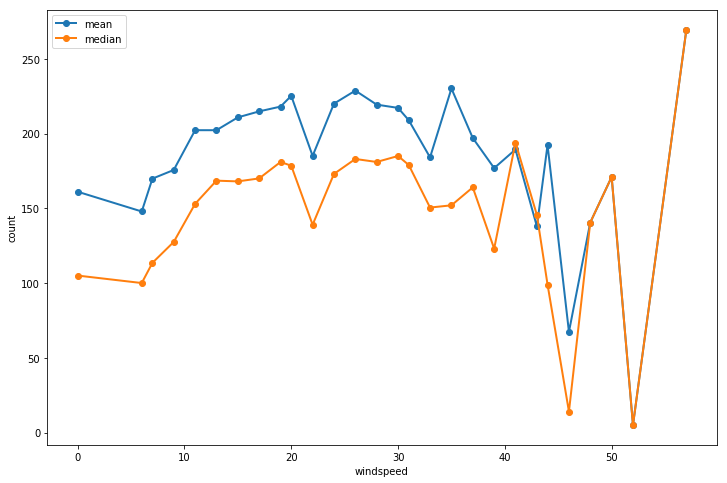

In [12]:
## windspeed feature
# plot mean and median of count as function of the windspeed
var = 'windspeed'
f, ax = plt.subplots(figsize = (12, 8) )
group_ws = data_df[[var, 'count']].groupby([var], as_index=False)
sample_size = group_ws.size()
ax.plot(group_ws.mean()[var],group_ws.mean()['count'], 'o-', lw = 2, label = 'mean' )
ax.plot(group_ws.median()[var],group_ws.median()['count'], 'o-',lw = 2, label = 'median')
ax.legend()
ax.set(xlabel=var, ylabel='count', label='big')
plt.savefig('windspeed.png')

             datetime  season  weather  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00       1        1  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00       1        1  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00       1        1  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00       1        1  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00       1        1  9.84  14.395        75        0.0   

   count  Year  Month  Day  Hour  
0     16  2011      1    5     0  
1     40  2011      1    5     1  
2     32  2011      1    5     2  
3     13  2011      1    5     3  
4      1  2011      1    5     4  
            season   weather      temp     atemp  humidity  windspeed  \
season    1.000000  0.008879  0.258689  0.264744  0.190610  -0.147121   
weather   0.008879  1.000000 -0.055035 -0.055376  0.406244   0.007261   
temp      0.258689 -0.055035  1.000000  0.984948 -0.064949  -0.017852   
atemp     0.264744 -0.055376  0.984

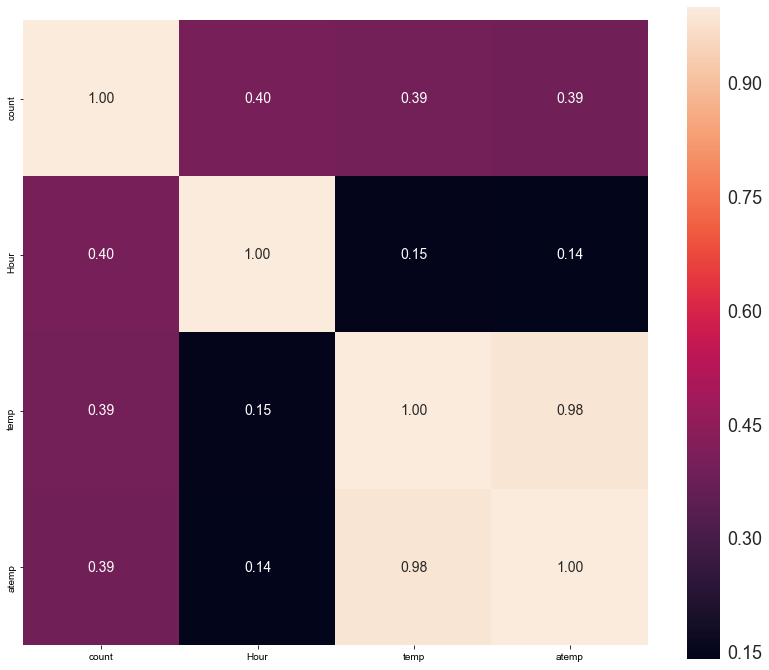

In [4]:
##  create correlation matrix
data_corr = data_df.drop(['registered', 'casual', 'workingday', 'holiday'], axis = 1)
print(data_corr.head())
corrmat = data_corr.corr()
print(corrmat.head())
f, ax = plt.subplots(figsize=(14, 12))
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'count').index
cm = np.corrcoef(data_corr[cols].values.T)
#print(cm)
sns.set(font_scale=1.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('cor.png')

In [14]:
# Feature engineering 2: from the features month, day, hours we create cyclical features
data_df['hour_sin'] = np.sin(data_df.Hour*(2.*np.pi/24))
data_df['hour_cos'] = np.cos(data_df.Hour*(2.*np.pi/24))
data_df['month_sin'] = np.sin((data_df.Month-1)*(2.*np.pi/12))
data_df['month_cos'] = np.cos((data_df.Month-1)*(2.*np.pi/12))
data_df['day_sin'] = np.sin((data_df.Day)*(2.*np.pi/7))
data_df['day_cos'] = np.cos((data_df.Day)*(2.*np.pi/7))

# create features array dropping the target and the useless features
data_X =  data_df.drop(['datetime','casual', 'atemp', 'workingday','windspeed','registered', 'count', 'Hour', 'Month',  'Day'], axis = 1)
# create target array
data_y = data_df['count']

## I convert numerical in categorical and boolean data (optional for random forest)
data_X['weather'] = data_X['weather'].astype('category')
data_X['holiday'] = data_X['holiday'].astype('bool')

# I create my model with parameters previously chosen using a crossing validation grid_search
rfr = RandomForestRegressor(n_jobs=-1, n_estimators = 500, max_depth = 90)  
# shuffle data and choose n_splits for cross validations
cv = ShuffleSplit(n_splits=10)
# cross validation to evaluate the model
val = cross_val_score(rfr, data_X, data_y, cv = cv, scoring = 'neg_mean_absolute_error')
print('the mean absolute error is %.2f' %-val.mean())

the mean absolute error is 23.85
